In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd

PCOS_inf = pd.read_csv('./PCOS_infertility.csv')
PCOS_woinf = pd.read_excel('./PCOS_data_without_infertility.xlsx', sheet_name="Full_new")

data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', 
                 '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

data.columns = [col.strip() for col in data.columns]

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1)
y=data["PCOS (Y/N)"]

## Random_Forest

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2020, stratify=y)

In [4]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [5]:
import pickle
filename = 'RF_model_1.sav'
lm_rfc = pickle.load(open(filename, 'rb'))

acc_rfc_train = round(lm_rfc.score(X_train_scaled, y_train)*100,2) 
acc_rfc_test = round(lm_rfc.score(X_test_scaled,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rfc_train))
print("Testing Accuracy: % {}".format(acc_rfc_test))

Training Accuracy: % 100.0
Testing Accuracy: % 87.16


## PCA

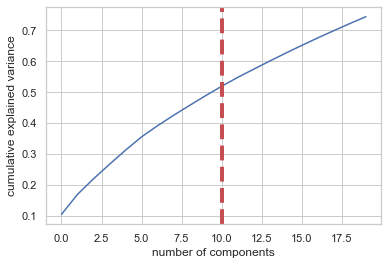

   Cumulative Variance Ratio  Explained Variance Ratio
0                   0.104263                  0.104263
1                   0.168910                  0.064647
2                   0.219380                  0.050470
3                   0.266467                  0.047087
4                   0.312133                  0.045666
5                   0.355205                  0.043072
6                   0.391291                  0.036086
7                   0.425005                  0.033714
8                   0.457069                  0.032063
9                   0.488621                  0.031553


In [6]:
pca_test = PCA(n_components=20)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
plt.show()

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
print(pca_df.head(10))

In [7]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [8]:
filename = 'RF_Model_pca.sav'
lm_rfc_pca = pickle.load(open(filename, 'rb'))

acc_rfc_train = round(lm_rfc_pca.score(X_train_scaled_pca, y_train)*100,2) 
acc_rfc_test = round(lm_rfc_pca.score(X_test_scaled_pca, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rfc_train))
print("Testing Accuracy: % {}".format(acc_rfc_test))

Training Accuracy: % 100.0
Testing Accuracy: % 86.24


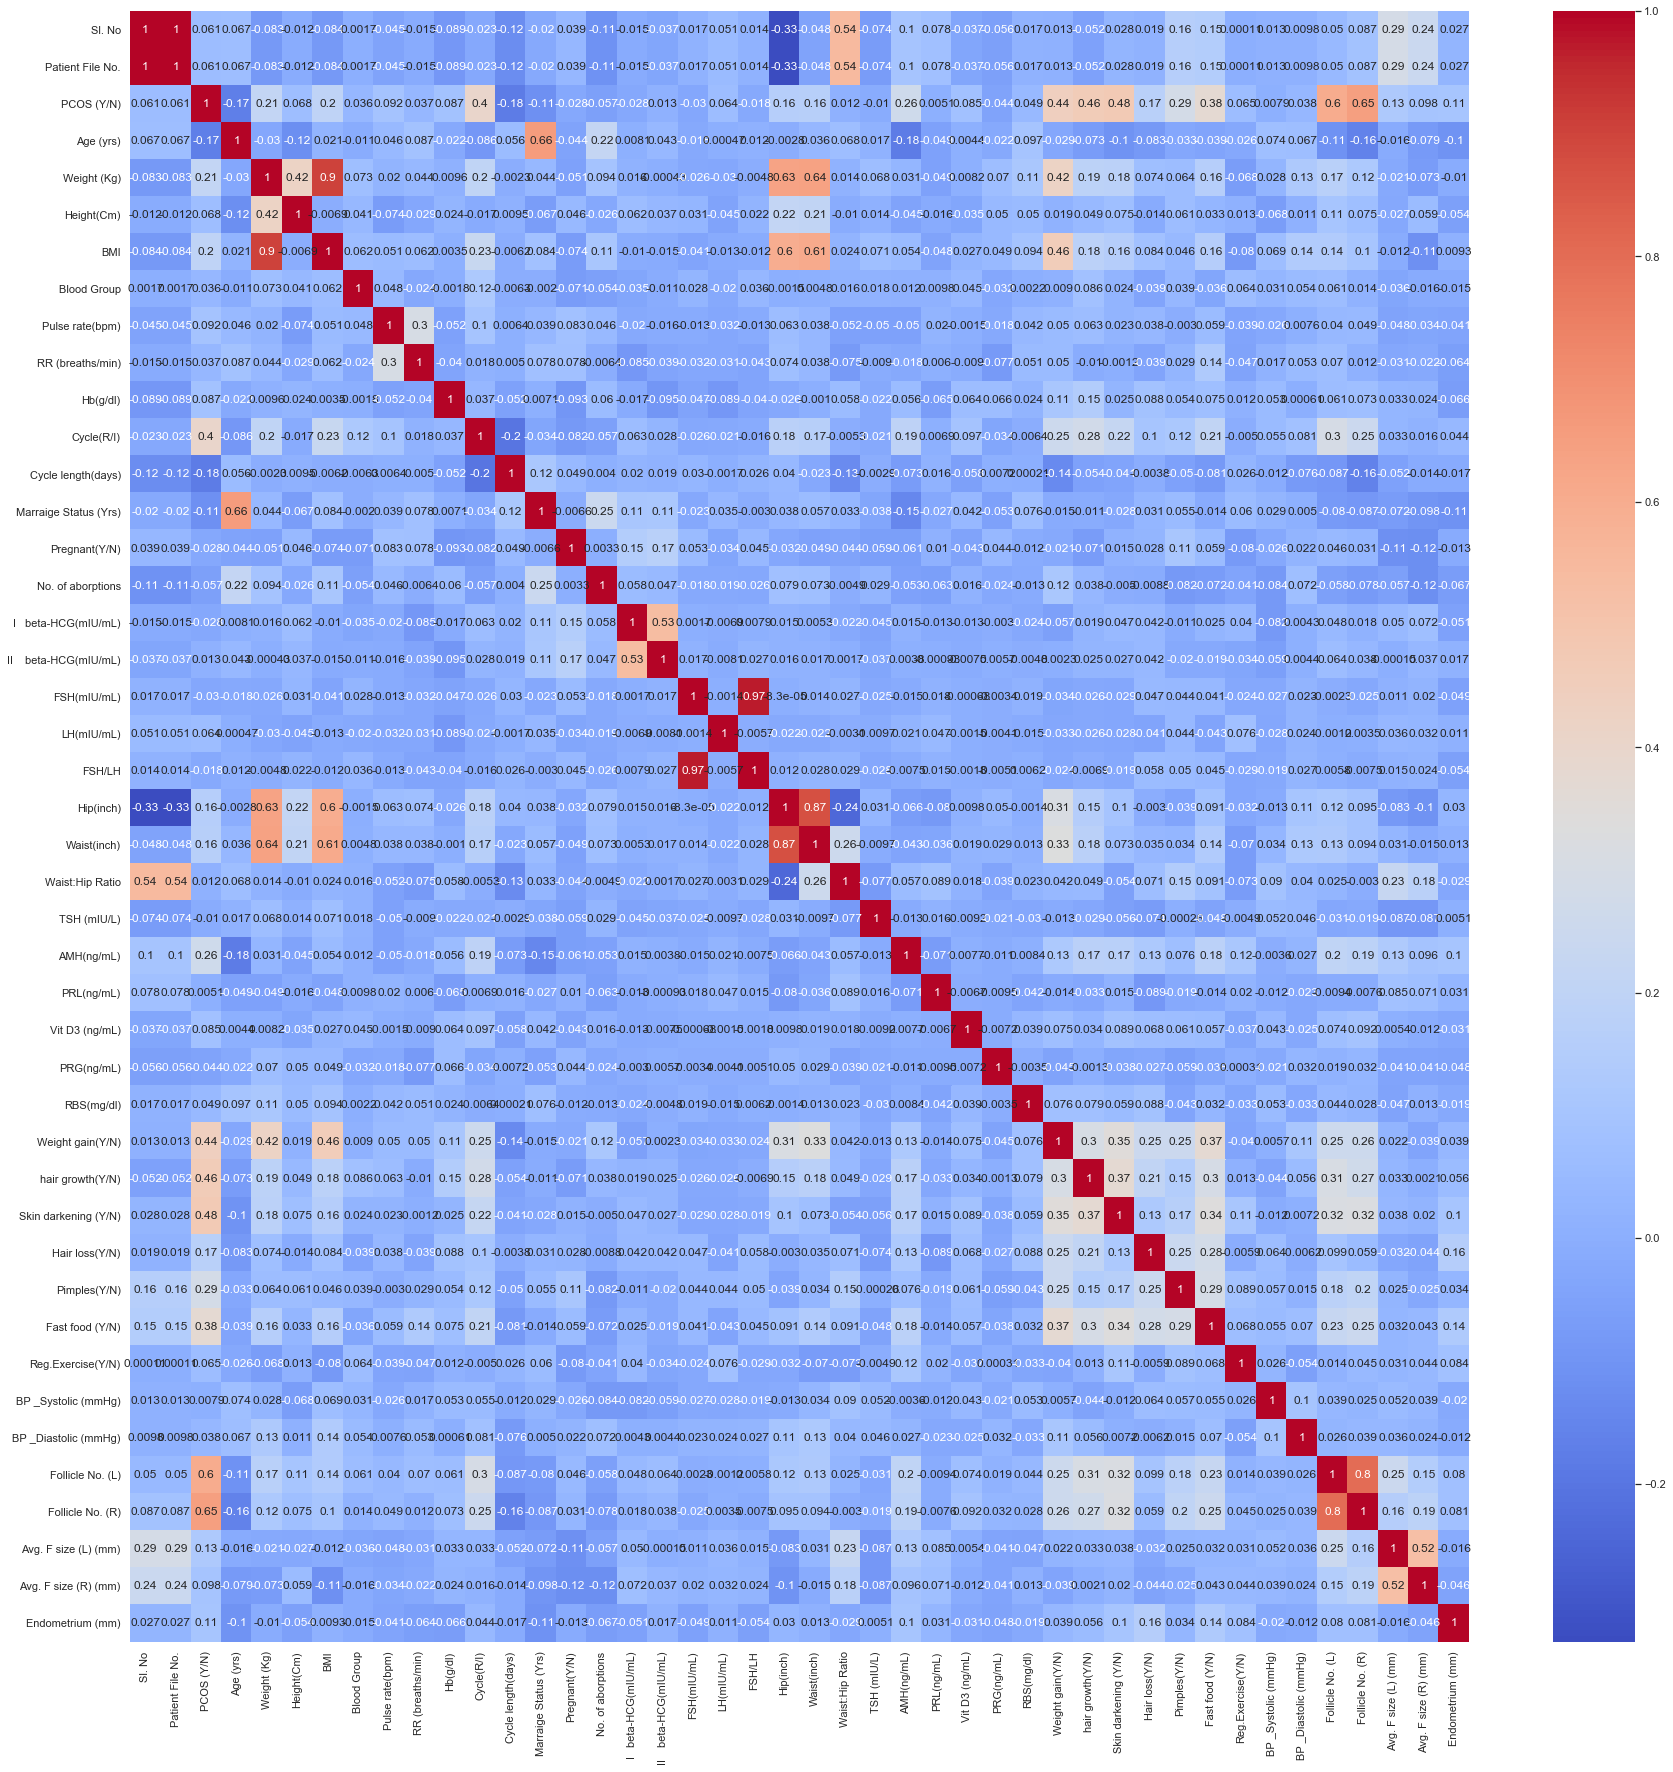

In [9]:
corr= data.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [10]:
import shap

explainer = shap.Explainer(lm_rfc)
shap_test = explainer(X_test_scaled)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 109

Sample shap value:
.values =
array([[-2.55586539e-02,  2.55586539e-02],
       [ 7.02478082e-03, -7.02478082e-03],
       [ 1.28312332e-03, -1.28312332e-03],
       [ 4.99346191e-03, -4.99346191e-03],
       [ 1.53949552e-03, -1.53949552e-03],
       [ 2.74630517e-03, -2.74630517e-03],
       [ 7.03155262e-03, -7.03155262e-03],
       [ 1.60322575e-03, -1.60322575e-03],
       [ 2.35271750e-02, -2.35271750e-02],
       [ 1.67298008e-02, -1.67298008e-02],
       [-1.70253201e-02,  1.70253201e-02],
       [-7.28875749e-04,  7.28875749e-04],
       [-6.32145573e-05,  6.32145573e-05],
       [-2.11846024e-03,  2.11846024e-03],
       [ 2.21799316e-03, -2.21799316e-03],
       [-1.95900258e-03,  1.95900258e-03],
       [-7.60896231e-04,  7.60896231e-04],
       [ 8.85187293e-04, -8.85187293e-04],
       [-1.76411493e-05,  1.76411493e-05],
       [ 5.67170294e-04, -5.67170294e-04],
       [-5.04954703e-04,  5.04954703e-04],
       [-5.78056333e-04,  5.78056333e-04],


In [11]:
print(f"Expected value: {explainer.expected_value[0]:.1f}")
print(f"Average target value (training data): {y_train.mean():.1f}")
print(f"Base value: {np.unique(shap_test.base_values)[0]:.1f}")

Expected value: 0.7
Average target value (training data): 0.3
Base value: 0.3


In [26]:
(shap_test.data == X_test).describe()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


In [27]:
shap_df = pd.DataFrame(shap_test.data, columns=shap_test.feature_names, index=X_test.index)
shap_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
350,-1.794545,-0.327818,-0.403983,-0.165591,-0.418523,-0.243452,-0.732645,-0.407428,-0.630038,0.646997,...,1.047419,0.959166,-0.584478,-0.586014,0.618292,0.921797,-0.154630,-0.015956,-1.079764,0.233739
37,-1.043522,1.182869,0.085013,1.260977,-1.517621,-0.666677,-0.732645,-0.176566,-0.630038,0.000000,...,-0.954727,-1.042572,-0.584478,0.710902,0.618292,-1.201395,-1.042339,-2.378525,-2.165871,0.683757
457,-0.104743,-2.027341,0.328859,-2.327016,0.680576,1.449446,0.448335,0.977741,1.573821,-1.940990,...,1.047419,-1.042572,-0.584478,0.710902,-1.484875,0.214067,-0.154630,0.539942,1.092450,-0.216280
81,0.458524,0.049854,0.900005,-0.353160,-0.418523,-0.243452,-1.913626,1.554895,-0.630038,0.000000,...,-0.954727,-1.042572,-0.584478,0.710902,0.618292,0.449977,-0.154630,0.261993,-0.148815,-0.081274
200,-0.292499,-1.177580,0.248011,-1.379266,0.680576,-0.031840,-0.732645,0.054295,-0.630038,0.646997,...,1.047419,0.959166,1.710927,0.710902,-14.524513,-0.965484,-1.264266,-1.127753,-0.459132,-1.116316


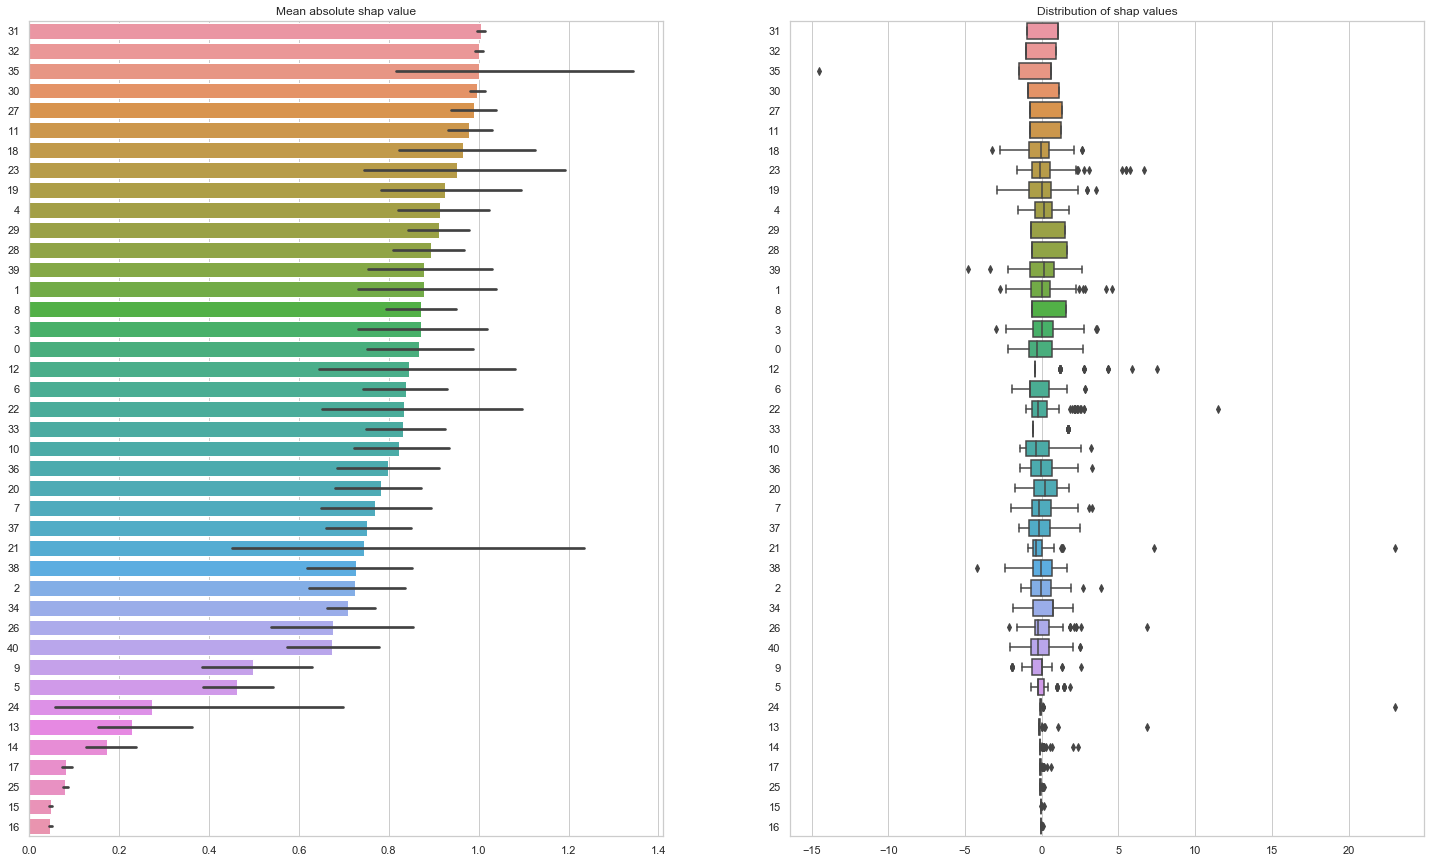

In [21]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index
fig, ax = plt.subplots(1, 2, figsize=(25,15))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h', 
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

In [24]:
np.isclose(lm_rfc.predict(X_test_scaled), 
           explainer.expected_value[0] + shap_df.sum(axis=1))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

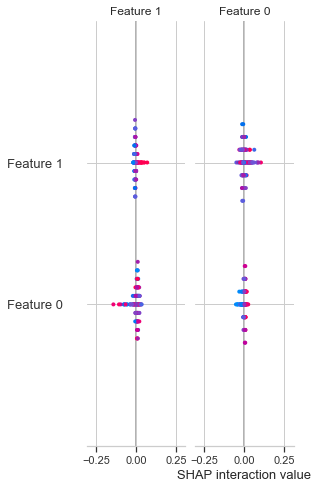

In [29]:
shap.summary_plot(shap_test)


In [47]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_test.values[0], 
                X_test_scaled)

In [52]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_test.values[0], 
                X_test_scaled)

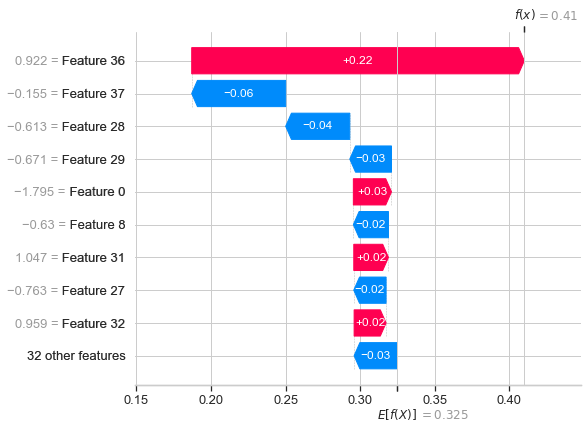

In [50]:
shap.plots.waterfall(shap_test[:,:,1][0])

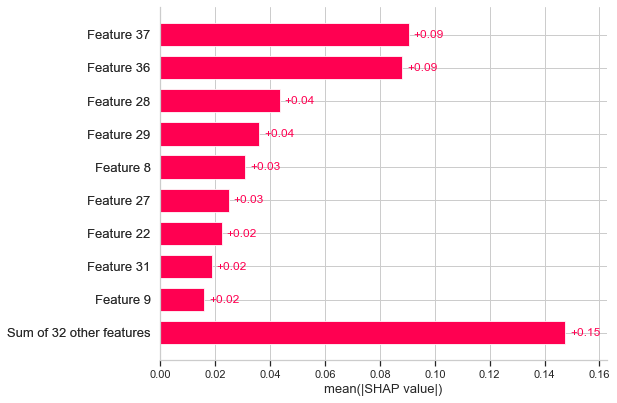

In [51]:
shap.plots.bar(shap_test[:,:,1])

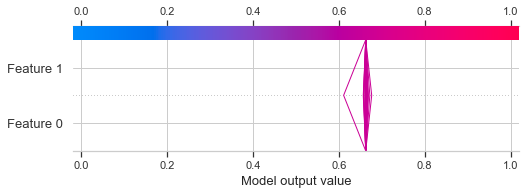

In [59]:
shap.decision_plot(explainer.expected_value[0], shap_test.values[0], link='logit')